<a href="https://colab.research.google.com/github/yousefhassan1999/K-ways-normalized-cut/blob/main/K%20ways%20normalized%20cut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
import math

In [ ]:
data = np.array([[5,8],[10,8],[11,8],[6,7],[10,7],[12,7],[13,7],[5,6],[10,6],[13,6],[14,6],[6,5],[11,5],[15,5],[2,4],[3,4],[5,4],[6,4],[7,4],[9,4],[15,4],[3,3],[7,3],[8,2]])
print(data.shape)

(24, 2)


In [ ]:
def RBFKernel(data,gamma):
  sim = np.zeros((data.shape[0],data.shape[0]))
  for i in range(data.shape[0]):
    for j in range(data.shape[0]):
      sim[i,j] = math.exp(-gamma*(np.linalg.norm(data[i]-data[j])**2))
  return sim

def graph_3NN (data):
  A = kneighbors_graph(data, 3, mode='connectivity', include_self=True)
  return A.toarray()

In [ ]:
def plot(Y):
  plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")
  # Creating plot
  ax.scatter3D(Y[:,0],Y[:,1], Y[:,2])
  plt.title("Normalized eign vectors")
  # show plot
  plt.show()

def Normalize(U):
  row_sums = U.sum(axis=1)
  return U / row_sums[:, np.newaxis];

def NormalizedCut(A,K):
  delta = np.zeros((A.shape[0],A.shape[0]))
  for i in range(A.shape[0]):
    delta[i,i] = np.sum(A[i])
  B = np.identity(A.shape[0]) - np.dot(np.linalg.inv(delta),A)
  U = np.linalg.eigh(B)[1][:,:K]
  Y = Normalize(U);
  if K == 3:
    plot(Y)
  return KMeans(n_clusters=K, random_state=0).fit(Y).labels_

In [ ]:
Order = np.array(['a','b','c','d','e','f','g','h','I','j','n','k','m','o','p','q','r','s','t','l','u','v','w','x'])
def ShowResults(result,N):
  print(f'result = {result}')
  for c in range(N):
    print(f'C{c+1} = {Order[result == c]}')


for gama = 0.01 



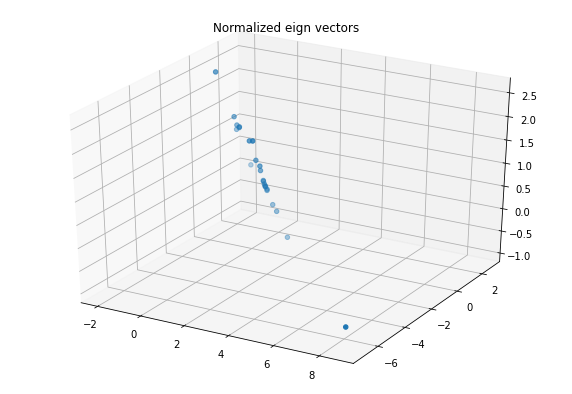

result = [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 2 2 2 0 2 2 2]
C1 = ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'I' 'j' 'n' 'm' 'o' 'p' 'q' 'u']
C2 = ['k']
C3 = ['r' 's' 't' 'l' 'v' 'w' 'x']

for gama = 0.1 



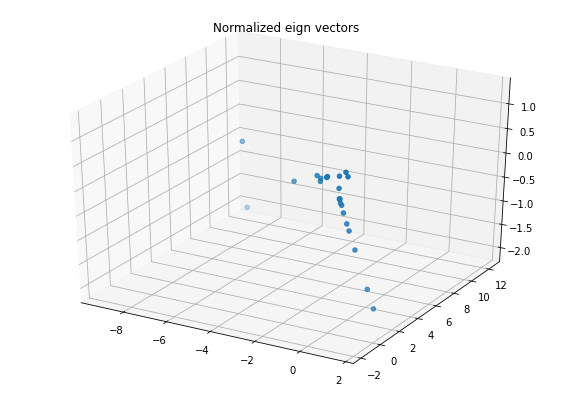

result = [0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0]
C1 = ['a' 'b' 'c' 'e' 'f' 'g' 'h' 'I' 'j' 'n' 'm' 'o' 'p' 'q' 'r' 't' 'l' 'u'
 'v' 'w' 'x']
C2 = ['d' 's']
C3 = ['k']

for gama = 1 



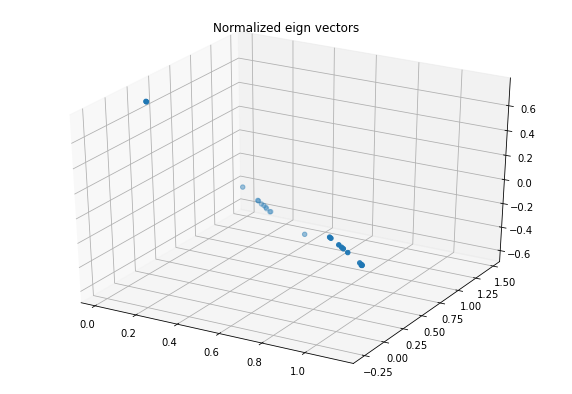

result = [1 0 0 1 0 0 0 1 0 0 0 1 0 0 2 2 1 1 1 1 0 2 1 1]
C1 = ['b' 'c' 'e' 'f' 'g' 'I' 'j' 'n' 'm' 'o' 'u']
C2 = ['a' 'd' 'h' 'k' 'r' 's' 't' 'l' 'w' 'x']
C3 = ['p' 'q' 'v']

for gama = 10 



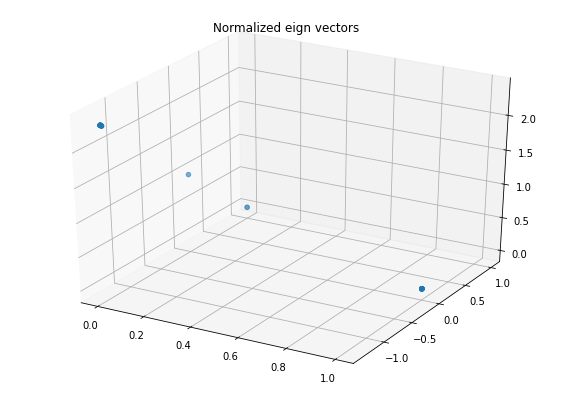

result = [1 0 0 1 0 0 0 1 0 0 0 1 0 0 2 2 1 1 1 0 0 2 1 1]
C1 = ['b' 'c' 'e' 'f' 'g' 'I' 'j' 'n' 'm' 'o' 'l' 'u']
C2 = ['a' 'd' 'h' 'k' 'r' 's' 't' 'w' 'x']
C3 = ['p' 'q' 'v']

 Using 3NN graph



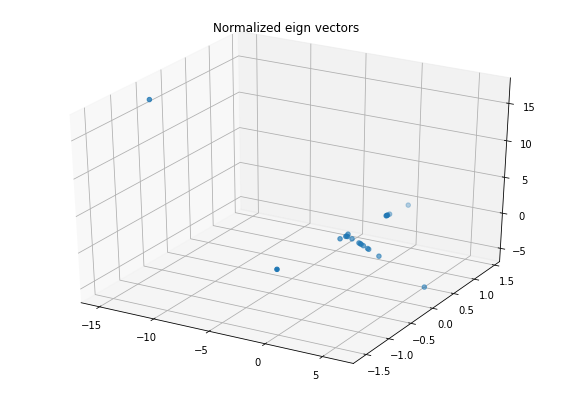

result = [1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
C1 = ['b' 'c' 'e' 'f' 'g' 'h' 'I' 'j' 'n' 'k' 'm' 'o' 'p' 'q' 'r' 's' 't' 'l'
 'u' 'v' 'w' 'x']
C2 = ['a']
C3 = ['d']


In [ ]:
# Q3 Part1 Results
gama = [0.01,0.1,1,10]
for g in gama:
  print(f'\nfor gama = {g} \n')
  ShowResults(NormalizedCut(RBFKernel(data,g),3),3)
  
print('\n Using 3NN graph\n')
ShowResults(NormalizedCut(graph_3NN(data),3),3)


Kmeans for K = 2

result = [0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0]
C1 = ['a' 'd' 'h' 'k' 'p' 'q' 'r' 's' 't' 'l' 'v' 'w' 'x']
C2 = ['b' 'c' 'e' 'f' 'g' 'I' 'j' 'n' 'm' 'o' 'u']

Kmeans for K = 3

result = [1 0 0 1 0 0 2 1 0 2 2 1 0 2 1 1 1 1 1 0 2 1 1 1]
C1 = ['b' 'c' 'e' 'f' 'I' 'm' 'l']
C2 = ['a' 'd' 'h' 'k' 'p' 'q' 'r' 's' 't' 'v' 'w' 'x']
C3 = ['g' 'j' 'n' 'o' 'u']

Kmeans for K = 4

result = [1 0 0 1 0 0 2 1 0 2 2 1 0 2 1 1 1 1 3 3 2 1 3 3]
C1 = ['b' 'c' 'e' 'f' 'I' 'm']
C2 = ['a' 'd' 'h' 'k' 'p' 'q' 'r' 's' 'v']
C3 = ['g' 'j' 'n' 'o' 'u']
C4 = ['t' 'l' 'w' 'x']

---------------------------


K-Way Normalized for K = 2

result = [0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0]
C1 = ['a' 'd' 'e' 'h' 'I' 'k' 'm' 'p' 'r' 's' 't' 'l' 'w' 'x']
C2 = ['b' 'c' 'f' 'g' 'j' 'n' 'o' 'q' 'u' 'v']

K-Way Normalized for K = 3



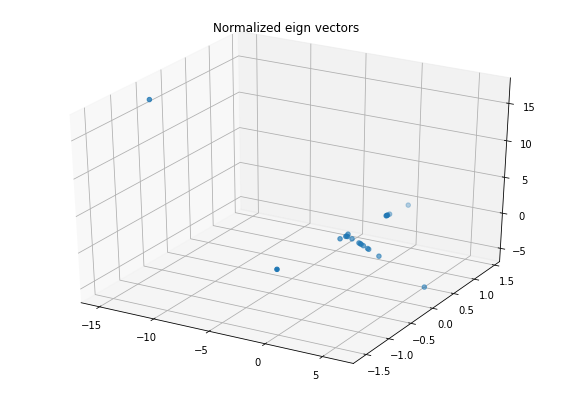

result = [1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
C1 = ['b' 'c' 'e' 'f' 'g' 'h' 'I' 'j' 'n' 'k' 'm' 'o' 'p' 'q' 'r' 's' 't' 'l'
 'u' 'v' 'w' 'x']
C2 = ['a']
C3 = ['d']

K-Way Normalized for K = 4

result = [1 0 0 2 0 0 0 3 0 0 0 3 0 0 0 0 3 3 3 0 0 0 3 3]
C1 = ['b' 'c' 'e' 'f' 'g' 'I' 'j' 'n' 'm' 'o' 'p' 'q' 'l' 'u' 'v']
C2 = ['a']
C3 = ['d']
C4 = ['h' 'k' 'r' 's' 't' 'w' 'x']


In [ ]:
# Q1,2 Part2 Results
for K in range(2,5):
  print(f'\nKmeans for K = {K}\n')
  ShowResults(KMeans(n_clusters=K, random_state=0).fit(data).labels_ , K)

print("\n---------------------------\n")

for K in range(2,5):
  print(f'\nK-Way Normalized for K = {K}\n')
  ShowResults(NormalizedCut(graph_3NN(data),K),K)

In [ ]:
for K in range(2,5):
  print(f'\nKmeans for K = {K}\n')
  result = KMeans(n_clusters=K, random_state=0).fit(data).labels_
  print(f'result = {result}')
  for c in range(K):
    print(f'C{c+1} = {Order[result == c]}')

Order = np.array(['a','b','c','d','e','f','g','h','I','j','n','k','m','o','p','q','r','s','t','l','u','v','w','x'])
def ShowResults(result,N):
  print(f'result = {result}')
  for c in range(N):
    print(f'C{c+1} = {Order[result == c]}')


Kmeans for K = 2

result = [0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0]
C1 = ['a' 'd' 'h' 'k' 'p' 'q' 'r' 's' 't' 'l' 'v' 'w' 'x']
C2 = ['b' 'c' 'e' 'f' 'g' 'I' 'j' 'n' 'm' 'o' 'u']

Kmeans for K = 3

result = [1 0 0 1 0 0 2 1 0 2 2 1 0 2 1 1 1 1 1 0 2 1 1 1]
C1 = ['b' 'c' 'e' 'f' 'I' 'm' 'l']
C2 = ['a' 'd' 'h' 'k' 'p' 'q' 'r' 's' 't' 'v' 'w' 'x']
C3 = ['g' 'j' 'n' 'o' 'u']

Kmeans for K = 4

result = [1 0 0 1 0 0 2 1 0 2 2 1 0 2 1 1 1 1 3 3 2 1 3 3]
C1 = ['b' 'c' 'e' 'f' 'I' 'm']
C2 = ['a' 'd' 'h' 'k' 'p' 'q' 'r' 's' 'v']
C3 = ['g' 'j' 'n' 'o' 'u']
C4 = ['t' 'l' 'w' 'x']
